In [1]:
energy_isee_path = "D:/data/metric_news/series/11158/energy_isee.csv"
energy_pinoisee_path = "D:/data/metric_news/series/11158/energy_pinoisee.csv"
energy_pinocongrid_path = "D:/data/metric_news/series/11158/energy_pinocongrid.csv"

energy_lambda_01 = "./nf2_paper/res_lambda_01.csv"
energy_w1 = "./nf2_paper/res_w1.csv"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

In [3]:
df_isee = pd.read_csv(energy_isee_path)
df_isee.head()

,obstime,energy,energy_pot,dx,dy,dz
0,20110213_120000,3.352179e+09,2.770252e+09,0.529556,0.536675,0.536672
1,20110213_130000,3.555945e+09,2.940118e+09,0.529556,0.536675,0.536672
2,20110213_140000,3.716303e+09,3.065508e+09,0.529556,0.536675,0.536672
3,20110213_150000,3.940641e+09,3.223590e+09,0.529556,0.536675,0.536672
4,20110213_160000,4.086347e+09,3.308736e+09,0.529556,0.536675,0.536672


In [4]:
df_pinoisee = pd.read_csv(energy_pinoisee_path)
df_pinoisee.head()

,obstime,energy
0,20110213_120000,3.083682e+09
1,20110213_130000,3.282693e+09
2,20110213_140000,3.396630e+09
3,20110213_150000,3.581743e+09
4,20110213_160000,3.670362e+09


In [5]:
df_pinocongrid = pd.read_csv(energy_pinocongrid_path)
df_pinocongrid.head()

,obstime,energy,dx,dy
0,20110211_000000,172841600.0,0.529878,0.537348
1,20110211_001200,180988000.0,0.529878,0.537348
2,20110211_002400,186588100.0,0.529878,0.537348
3,20110211_003600,190349310.0,0.529878,0.537348
4,20110211_004800,193393860.0,0.529878,0.537348


In [6]:
df_lambda_01 = pd.read_csv(energy_lambda_01)
df_lambda_01.head()

,obstime,pred_E_1e33,pot_E_1e33
0,2011-02-12 00:00:00,0.064569,0.064284
1,2011-02-12 00:12:00,0.065259,0.064455
2,2011-02-12 00:24:00,0.066330,0.065504
3,2011-02-12 00:36:00,0.066692,0.065078
4,2011-02-12 00:48:00,0.066290,0.064759


In [7]:
df_w1 = pd.read_csv(energy_w1)
df_w1.head()

,obstime,pred_E_1e33,pot_E_1e33
0,2011-02-12 00:00:00,0.093698,0.088480
1,2011-02-12 01:00:00,0.096548,0.091139
2,2011-02-12 02:00:00,0.100595,0.095158
3,2011-02-12 03:00:00,0.102448,0.096038
4,2011-02-12 04:00:00,0.100419,0.094921


In [8]:
dx = df_isee["dx"][0]
dy = df_isee["dy"][0]
dz = dy

dV = dx * dy * dz  # Mm^3
dV *= 1e-9  # 33 erg
dV

1.5252255078307433e-10

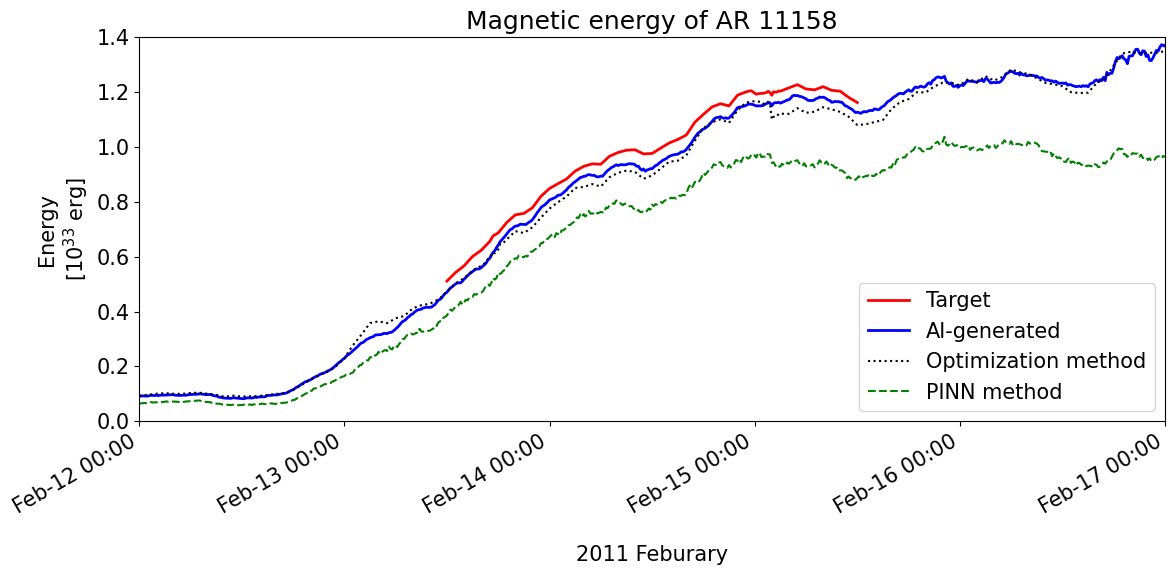

In [22]:
plt.rcParams['font.size'] = 15

obstime_isee = df_isee['obstime'].apply(lambda x: pd.to_datetime(x, format="%Y%m%d_%H%M%S"))
energy_isee = df_isee['energy'] * dV
pot_isee = df_isee['energy_pot'] * dV 

# obstime_pinoisee = df_pinoisee['obstime'].apply(lambda x: pd.to_datetime(x, format="%Y%m%d_%H%M%S"))
# energy_pinoisee = df_pinoisee['energy'] * dV

obstime_pinocongrid = df_pinocongrid['obstime'].apply(lambda x: pd.to_datetime(x, format="%Y%m%d_%H%M%S"))
energy_pinocongrid = df_pinocongrid['energy'] * dV

obstime_lambda_01 = df_lambda_01['obstime'].apply(lambda x: pd.to_datetime(x, format="%Y-%m-%d %H:%M:%S"))
energy_lambda_01 = df_lambda_01['pred_E_1e33']

obstime_w1 = df_w1['obstime'].apply(lambda x: pd.to_datetime(x, format="%Y-%m-%d %H:%M:%S"))
energy_w1 = df_w1['pred_E_1e33']

figsize = (12, 6)
xlocator = mdates.HourLocator(interval=24)
# xformatter = mdates.DateFormatter('%Y-%m-%d %H:%M')
xformatter = mdates.DateFormatter('%b-%d %H:%M')
ylocator = 0.2

fig, ax = plt.subplots(figsize=figsize)
ax = plt.gca()
ax.plot(obstime_isee, energy_isee, label='Target', color='red', linewidth=2)
# ax.plot(obstime_pinoisee, energy_pinoisee, label='AI-generated', color='blue')
ax.plot(obstime_pinocongrid, energy_pinocongrid, label='AI-generated', color='blue', linewidth=2)
ax.plot(obstime_w1, energy_w1, label='Optimization method', color='black', linestyle=':')
ax.plot(obstime_lambda_01, energy_lambda_01, label='PINN method', color='green', linestyle='--')


ax.set_ylabel('Energy\n[$10^{33}$ erg]')
ax.set_xlabel('2011 Feburary', labelpad=20.0)

ax.set_ylim([0.0, 1.4])
ax.set_xlim([obstime_lambda_01.iloc[0], obstime_lambda_01.iloc[-1]]) 

ax.xaxis.set_major_locator(xlocator)
ax.xaxis.set_major_formatter(xformatter)
ax.yaxis.set_major_locator(ticker.MultipleLocator(ylocator))
fig.autofmt_xdate()

plt.legend(loc='lower right')
plt.title("Magnetic energy of AR 11158")
plt.tight_layout()
plt.savefig('11158.png', dpi=300)

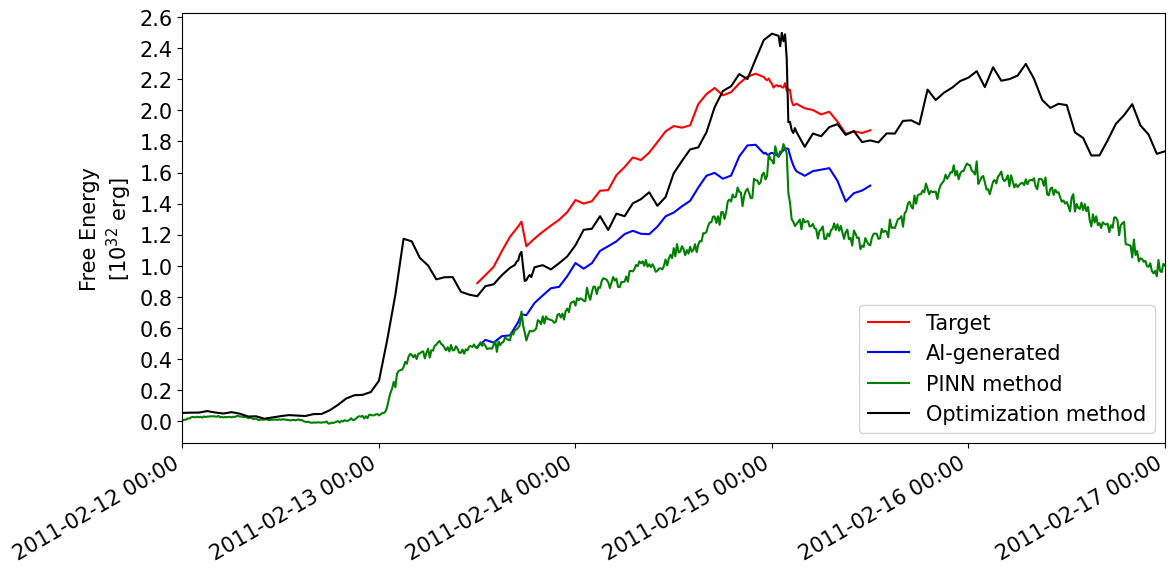

In [13]:
plt.rcParams['font.size'] = 15

obstime_isee = df_isee['obstime'].apply(lambda x: pd.to_datetime(x, format="%Y%m%d_%H%M%S"))
energy_isee = df_isee['energy'] * dV
pot_isee = df_isee['energy_pot'] * dV 

obstime_pinoisee = df_pinoisee['obstime'].apply(lambda x: pd.to_datetime(x, format="%Y%m%d_%H%M%S"))
energy_pinoisee = df_pinoisee['energy'] * dV

# obstime_pinocongrid = df_pinocongrid['obstime'].apply(lambda x: pd.to_datetime(x, format="%Y%m%d_%H%M%S"))
# energy_pinocongrid = df_pinocongrid['energy'] * dV

obstime_lambda_01 = df_lambda_01['obstime'].apply(lambda x: pd.to_datetime(x, format="%Y-%m-%d %H:%M:%S"))
energy_lambda_01 = df_lambda_01['pred_E_1e33']
pot_lambda_01 = df_lambda_01['pot_E_1e33']

obstime_w1 = df_w1['obstime'].apply(lambda x: pd.to_datetime(x, format="%Y-%m-%d %H:%M:%S"))
energy_w1 = df_w1['pred_E_1e33']
pot_w1 = df_w1['pot_E_1e33']

figsize = (12, 6)
xlocator = mdates.HourLocator(interval=24)
xformatter = mdates.DateFormatter('%Y-%m-%d %H:%M')
ylocator = 0.2

fig, ax = plt.subplots(figsize=figsize)
ax = plt.gca()
ax.plot(obstime_isee, (energy_isee-pot_isee)*10, label='Target', color='red')
ax.plot(obstime_pinoisee, (energy_pinoisee-pot_isee)*10, label='AI-generated', color='blue')
ax.plot(obstime_lambda_01, (energy_lambda_01-pot_lambda_01)*10, label='PINN method', color='green')
ax.plot(obstime_w1, (energy_w1-pot_w1)*10, label='Optimization method', color='black')

ax.set_ylabel('Free Energy\n[$10^{32}$ erg]')
# ax.set_xlabel('2011 Feburary', labelpad=20.0)

# ax.set_xlim([obstime_pinoisee.iloc[0], obstime_pinoisee.iloc[-1]]) 
ax.set_xlim([obstime_lambda_01.iloc[0], obstime_lambda_01.iloc[-1]]) 

ax.xaxis.set_major_locator(xlocator)
ax.xaxis.set_major_formatter(xformatter)
ax.yaxis.set_major_locator(ticker.MultipleLocator(ylocator))
fig.autofmt_xdate()

plt.legend(loc='lower right')
# plt.title("Magnetic energy of AR 11158")
plt.tight_layout()